In [2]:
!jt -t chesterish

# Introduction to Hull-White

## Shortcomings
Since it doesn't model the entire term structure like HJM or LMM it can't take into account correlation between points on the curve. Thus if the payoff of an instrument involves multiple points on a curve it will not price it accurately. I have no examples of such instruments, except perhaps a product with some Asian feature.

## The Model

<center style="border: 2px solid">

\begin{equation}
    \mathrm{d}r(t) = \left( \theta(t) - \alpha r(t)\right)\mathrm{d}t + \sigma(t) \mathrm{d} W(t)
\end{equation}

</center>

* $\theta(t)$ the mean reversion level (i.e. what the value $r(t)$ converges to as $t\rightarrow \infty$.
* $\alpha$ the mean reversion speed (i.e. the rate at which $r(t)$ converges to $\theta(t)$.
* $\sigma(t)$ the volatility which may be constant.


<font color="slate"><br/>
### Mean Reversion Speed: $\alpha$
</font>

I would argue that there are pairs of values $(\alpha, \sigma)$ which yield the same model. If the vol increases substantially one should be able to offset it with a significantly higher mean reversion speed.

<font color="slate"><br/>
### Mean Reversion Level: $\theta(t)$
</font>

It can be shown that $\theta(t)$ needs to satisfy the following relationship with regards to the instantaneous forward curve:

<center>

\begin{equation}
    \theta(t) = \alpha f(0,t) + \frac{\partial f(0,t)}{\partial t} + \frac{\sigma^2}{2\alpha}\left(1 - e^{-2\alpha t}\right)
\end{equation}

</center>

Let us consider some of the consequences of this equation and focus on each of the terms in more depth.

First let us consider the third term, $\frac{\sigma^2}{2\alpha}$, which is independent of the forward curve $f(0,t)$.

(0.0, 1.3)

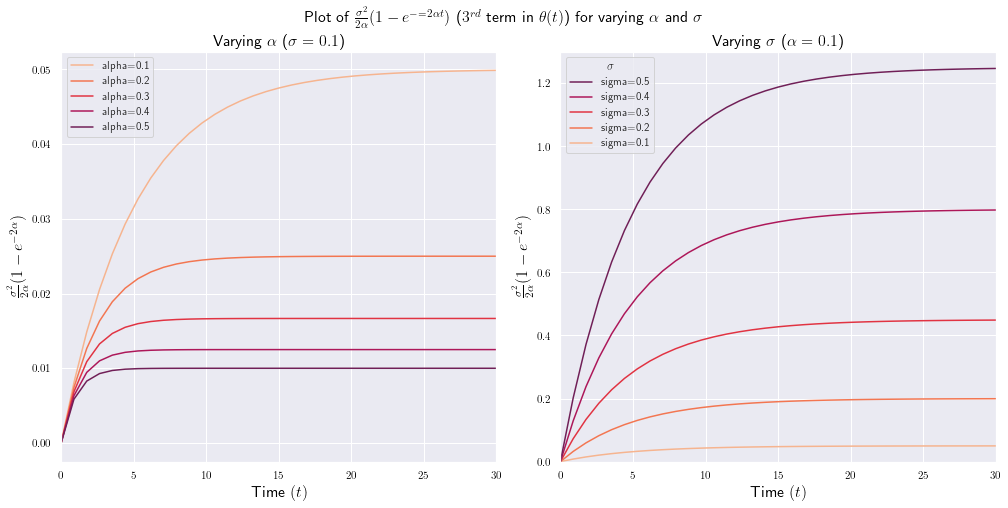

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Calibri"]})

px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(1000*px, 500*px))
font_size=16
font_color='black'
fig.suptitle(r'Plot of $\frac{\sigma^2}{2\alpha}(1 - e^{-=2\alpha t})$ ($3^{rd}$ term in $\theta(t)$) for varying $\alpha$ and $\sigma$', color=font_color, size=font_size, weight='bold')
sns.set_palette('rocket_r')
sns.set_style('darkgrid')

t = np.linspace(0.0, 30.0, 35)

for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
    sigma = 0.1
    third_term = (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=third_term, ax=ax1, label=f'{alpha=}')

ax1.legend()
ax1.set_title(r'Varying $\alpha$ ($\sigma=0.1$)', size=font_size, color=font_color, weight='bold')
ax1.set_xlabel(r'Time $(t)$', size=font_size, color=font_color, weight='bold')
ax1.set_ylabel(r'$\frac{\sigma^2}{2\alpha}(1 - e^{-2\alpha})$', size=font_size, color=font_color, weight='bold')
ax1.tick_params(axis='x', colors=font_color)
ax1.tick_params(axis='y', colors=font_color)
ax1.set_xlim(0, 30)
ax2.set_ylim(0, 0.05)

for sigma in [0.1, 0.2, 0.3, 0.4, 0.5]:
    alpha = 0.1
    third_term = (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=third_term, ax=ax2, label=f"{sigma=}")

handles, labels = ax2.get_legend_handles_labels()

ax2.legend(handles[::-1], labels[::-1], title='$\sigma$', loc='upper left')
ax2.set_title(r'Varying $\sigma$ ($\alpha=0.1$)', size=font_size, color=font_color, weight='bold')
ax2.set_xlabel(r'Time $(t)$', size=font_size, color=font_color, weight='bold')
ax2.set_ylabel(r'$\frac{\sigma^2}{2\alpha}(1 - e^{-2\alpha})$', size=font_size, color=font_color, weight='bold')
ax2.tick_params(axis='x', colors=font_color)
ax2.tick_params(axis='y', colors=font_color)
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 1.3)

\begin{equation}
    \theta(t) \propto \sigma
\end{equation}

But can we say

\begin{equation}
    \theta(t) \propto \alpha?
\end{equation}

This we can see that the impact of $\theta(t)$ to $r(t)$ is proportional to $\sigma$ and inversely proportional to $\alpha$.

This means that the forward curve needs to be continuous in the first derivative (given an example of this failing to be the case).

#### Constant Forward Curve

Clearly if the forward curve is constant then

>$\frac{\partial f(0,t)}{\partial t}=0$,

>$\lim\limits_{t \rightarrow \infty} \frac{\sigma^2}{2\alpha}(1 - e^{-2\alpha t}) = \frac{\sigma^2}{2\alpha}$

>$\lim\limits_{t \rightarrow \infty} \theta(t) = \alpha f(0,t) + \frac{\sigma^2}{2 \alpha}$.
In other words we can see for the simple case of the forward curve being flat/constant $\theta(t)$ and hence $r(t)$ does not simply converge to the initial forward curve.

In general, I would argue that $\lim\limits_{t\rightarrow\infty}\frac{\partial f(0,t)}{\partial t}=0$ assuming the forward curve flattens out in the long run.
Perhaps insert some examples of this.

Note in both cases below r = 0.1 yet the long term behaviour of $\theta(t)$ is far from that.

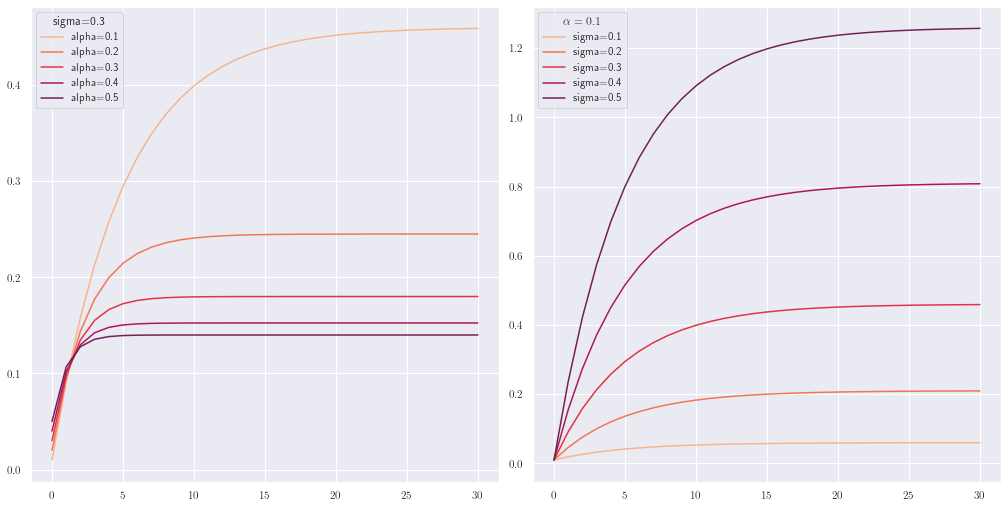

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

t = np.linspace(0, 30, 31)
r = np.zeros(31) + 0.1

alpha = 0.1
sigma = 0.3

px = 1/plt.rcParams['figure.dpi']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(1000*px, 500*px), constrained_layout=True)

dr = np.diff(r)
dr = np.append(dr, dr[-1])

for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
    theta = alpha * r + dr + (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=theta, ax=ax1, label=f'{alpha=}')  # So basically the third term dominates for a constant curve

ax1.legend(loc='upper left', title='sigma=0.3')

alpha = 0.1
for sigma in [0.1, 0.2, 0.3, 0.4, 0.5]:
    theta = alpha * r + dr + (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=theta, ax=ax2, label=f'{sigma=}')

ax2.legend(loc='upper left', title=r'$\alpha=0.1$')

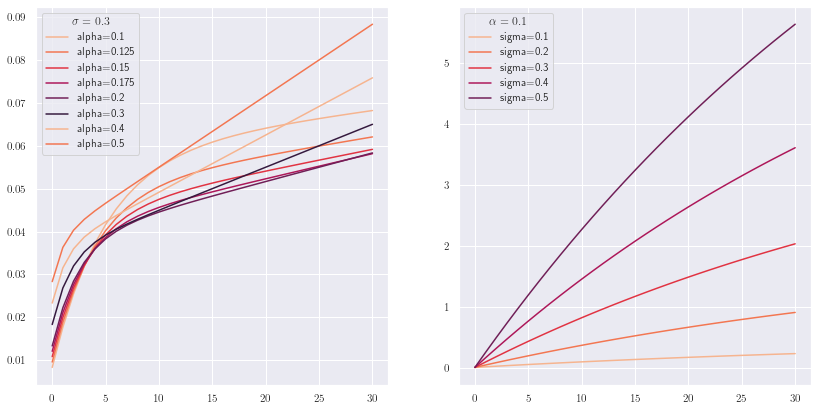

In [144]:
# Increasing swap curve
r = np.linspace(0.05, 0.15, 31)
t = np.linspace(0, 30, 31)

dr = np.diff(r)
dr = np.append(dr, dr[-1])

sigma = 0.1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(1000*px, 500*px))

for alpha in [0.1, 0.125, 0.15, 0.175, 0.2, 0.3, 0.4, 0.5]:
    theta = alpha * r + dr + (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=theta, label=f'{alpha=}', ax=ax1)

ax1.legend(loc='upper left', title=r'$\sigma=0.3$')

alpha = 0.01

for sigma in [0.1, 0.2, 0.3, 0.4, 0.5]:
    theta = alpha * r + dr + (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=theta, label=f'{sigma=}', ax=ax2)

ax2.legend(loc='upper left', title=r'$\alpha=0.1$')


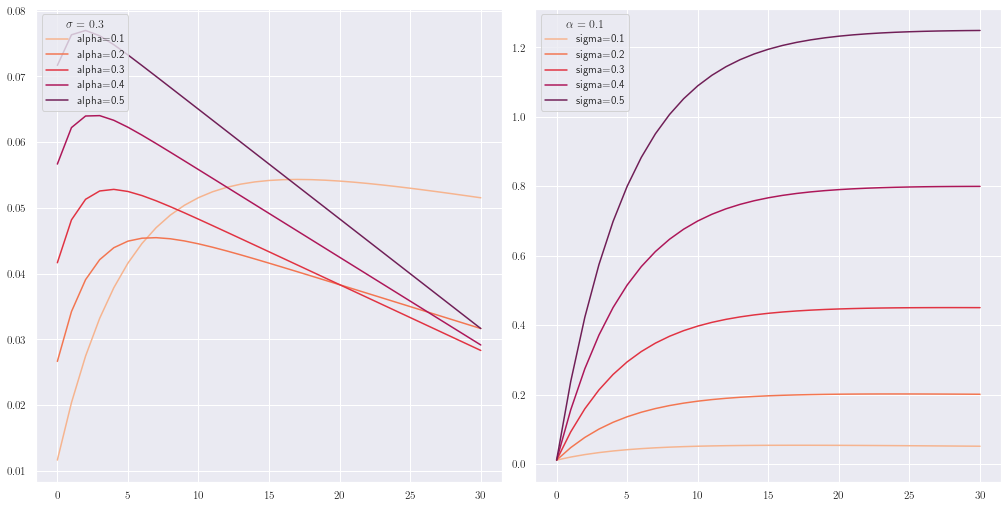

In [140]:
t = np.linspace(0, 30, 31)
r = np.linspace(0.15, 0.05, 31)

dr = np.diff(r)
dr = np.append(dr, dr[-1])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(1000*px, 500*px), constrained_layout=True)
sigma = 0.1
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
    theta = alpha * r + dr + (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=theta, label=f'{alpha=}', ax=ax1)

ax1.legend(loc='upper left', title=r'$\sigma=0.3$')

alpha = 0.1
for sigma in [0.1, 0.2, 0.3, 0.4, 0.5]:
    theta = alpha * r + dr + (sigma**2)/(2*alpha)*(1 - np.exp(-2*alpha*t))
    sns.lineplot(x=t, y=theta, ax=ax2, label=f'{sigma=}')

ax2.legend(loc='upper left', title=r'$\alpha=0.1$')

## Risk Neutral Calibration
Here we consider calibration to market instruments and hence calibration to market implied volatilities.

### Swaption Pricing

In order to calibrate the volatility term in Hull-White we need some instrument in the market which provides us with an implied volatility.
Sources may include swaptions, caps, and/or floors.

It turns out that we can price a swaption

## Real World Calibration
Here we consider calibration to historic time series and hence calibration to historic volatilities.


## Simulation

\begin{equation}
    r(t) = x(t) + \phi(t)
\end{equation}

Where
* $x(t)$ is stochastic,
* $\phi(t)$ is deterministic.

<center>

\begin{equation}
    \mathrm{d}x(t) = -\alpha x(t) + \sigma \mathrm{d}W(t),
\end{equation}

$x(0) = 0$

</center>

<center>

\begin{align}
    x(t_{i+1}) - x(t_i) &= -\alpha x(t_i) + \sigma \sqrt{\Delta t} Z \\
    x(t_{i+1}) &= (1 - \alpha) x(t_i) + \sigma \sqrt{\Delta t} Z
\end{align}

\begin{equation}
    Z \sim \mathcal{N}(0,1)
\end{equation}

</center>

(-0.5, 0.5)

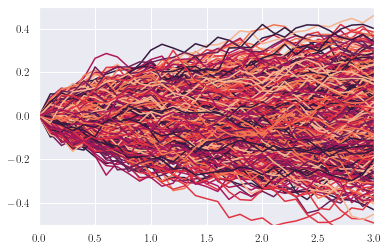

In [167]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.01
sigma = 0.1
dt = 0.1
x = np.zeros([31, 1000])

for j in range(0, 1000):
    for i in range(0,30):
        x[i+1, j] = (1-alpha)*x[i, j] + sigma * np.sqrt(dt) * np.random.standard_normal(1)

t = [i * dt for i in range(0, 31)]
_ = plt.plot(t, x)
plt.xlim(0, 3)
plt.ylim(-0.5, 0.5)

(-0.5, 0.5)

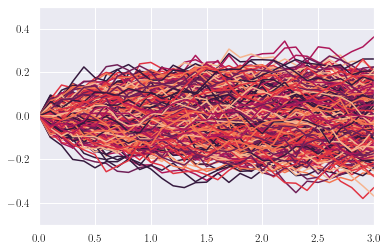

In [166]:
alpha = 0.05
sigma = 0.1
dt = 0.1
x = np.zeros([31, 1000])

for j in range(0, 1000):
    for i in range(0,30):
        x[i+1, j] = (1-alpha)*x[i, j] + sigma * np.sqrt(dt) * np.random.standard_normal(1)

t = [i * dt for i in range(0, 31)]
_ = plt.plot(t, x)
plt.xlim(0, 3)
plt.ylim(-0.5, 0.5)

(-0.5, 0.5)

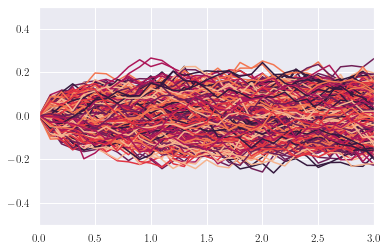

In [165]:
alpha = 0.1
sigma = 0.1
dt = 0.1
x = np.zeros([31, 1000])

for j in range(0, 1000):
    for i in range(0,30):
        x[i+1, j] = (1-alpha)*x[i, j] + sigma * np.sqrt(dt) * np.random.standard_normal(1)

t = [i * dt for i in range(0, 31)]
_ = plt.plot(t, x)
plt.xlim(0, 3)
plt.ylim(-0.5, 0.5)

(-0.5, 0.5)

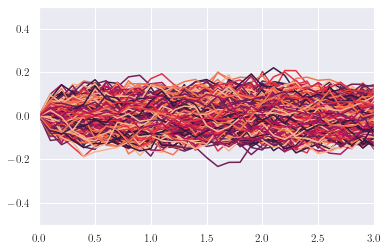

In [168]:
alpha = 0.2
sigma = 0.1
dt = 0.1
x = np.zeros([31, 1000])

for j in range(0, 1000):
    for i in range(0,30):
        x[i+1, j] = (1-alpha)*x[i, j] + sigma * np.sqrt(dt) * np.random.standard_normal(1)

t = [i * dt for i in range(0, 31)]
_ = plt.plot(t, x)
plt.xlim(0, 3)
plt.ylim(-0.5, 0.5)

### Ostrovski's Method

\begin{equation}
x(t) = x(s) + \int\limits_s^t x(y) \mathrm{d}y
\end{equation}

We assume $x(s)$ is known i.e. we have simulated $x$ up to time $s$.


## Unit Tests
1. Observe behaviour of flat initial curve.
1. Observe behaviour of monotonically increasing initial curve.
1. Observe behaviour of monotonically decreasing initial curve.
1. Observe limiting behaviour of Hull-White as $\alpha\rightarrow 0$.
1. Observe limiting behaviour of Hull-White as $\sigma\rightarrow\infty$.
1. Test pricing of bond or FRA with several different vols to ensure they aren't dependent on the vol (as it should be if Hull-White has been implemented correctly).

## References
1. **XVA: Credit, Funding, and Capital Valuation Adjustments**; Wiley Finance Series; *Andrew Green*

# TODO
1. Implement the naive approximation to the stochastic process
2. Implement Ostrovski method of stochastic process
3. Compare 1 and 2
4. Compare to Milstein and Euler-Maruyama
5. See what Brandimarte does in his book
6. Price a bond option using HW analytical formula
7. Price a bond option using HW Monte Carlo
8. Price a swaption using HW analytical formula
9. Price a swaption using HW Motne Carlo
10. Price a cap using HW analytical formula
11. Price a cap using HW Monte Carlo
12. Price a floor using HW analytical formula
13. Price a floor using HW Monte Carlo
14. My gut tells me HW is less well behaved in the short end of the ZAR swap curve where there is a bit of kink.